<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 主要目標：了解各種 Seaborn 的圖示化套件如何使用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 【基礎21】

* 簡介：seaborn 基於 Python 且非常受歡迎的圖形可視化庫，在 Matplotlib 的基礎中，進行更高級的改善，讓作圖更加方便且快速，更方便做出具有分析價值且美觀的圖形。同時可高度兼容 numpy 與 pandas 數據結構。可更高效的掌握數據與圖表。
* 優點：
  * 視覺化統計關係
  * 購艦結構化多繪圖網格
  * 繪圖美學

## Seaborn圖樣式

Text(0, 0.5, 'title of the ylabel')

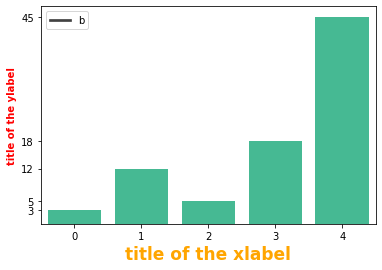

In [2]:
# data 設置
data = np.array([3, 12, 5, 18, 45])
bars = np.array(['A', 'B', 'C', 'D', 'E'])
y_pos = np.arange(len(bars))

plt.yticks([3, 5, 12, 18, 45])      # y 軸的刻度值
sns.barplot(x=y_pos, y=data, color=(0.2, 0.8, 0.6, 0.6)) # color 為 RGB 及 Alpha 調整

plt.legend(['b'], loc='best')       # 左上圖例添加

# Custom Axis title 需要調整 matplotlib 設置 x , y座標
plt.xlabel('title of the xlabel', fontweight='bold', color='orange', fontsize='17', horizontalalignment='center');
plt.ylabel('title of the ylabel', fontweight='bold', color='r', fontsize='10', horizontalalignment='center')

Text(0, 0.5, 'title of the ylabel')

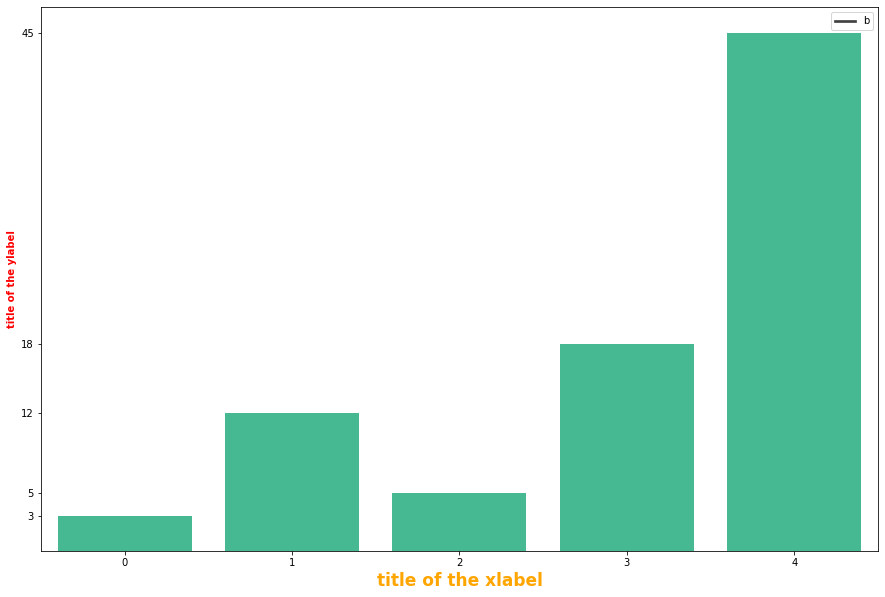

In [3]:
#可由此行調整尺寸
plt.figure(figsize=(15, 10)) 

# data 設置
data = np.array([3, 12, 5, 18, 45])
bars = np.array(['A', 'B', 'C', 'D', 'E'])
y_pos = np.arange(len(bars))

plt.yticks([3, 5, 12, 18, 45])      # y 軸的刻度值
sns.barplot(x=y_pos, y=data, color=(0.2, 0.8, 0.6, 0.6)) # color 為 RGB 及 Alpha 調整

plt.legend(['b'], loc='best')       # 左上圖例添加

# Custom Axis title 需要調整 matplotlib 設置 x , y座標
plt.xlabel('title of the xlabel', fontweight='bold', color='orange', fontsize='17', horizontalalignment='center');
plt.ylabel('title of the ylabel', fontweight='bold', color='r', fontsize='10', horizontalalignment='center')

* 有五種預設seaborn主題：<br>
  
| 名稱 | 說明 | 圖表背景顏色 | 備註 |
|------|:-----:|:-----:|:-----:|
| darkgrid | 灰色網格 | 有顏色，加上格線 | 預設值 |
| whitegrid | 白色網格 | 無顏色，加上格線 | |
| dark | 黑色 | 無顏色 | |
| white | 白格 | 無顏色 | |
| ticks | 十字交叉 | 在 x 軸及 y 軸座標的地方多了一條短短的線，輔助我們去做圖表上的位置核對 | |

* Matplotlib

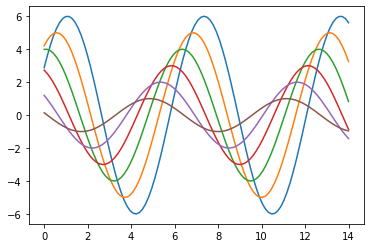

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

* seaborn

### 暫時設定圖形樣式
* 雖然來回切換很容易，但您也可以 axes_style() 在 with 語句中使用該功能來臨時設置繪圖參數。

* 背景：dark

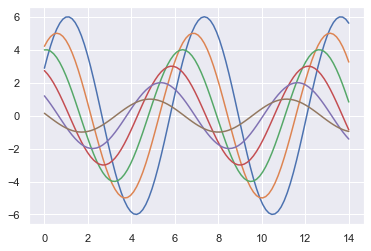

In [5]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set() #加入 sns.set() 為 seaborn 默認圖像
sinplot()

* 背景：whitegrid

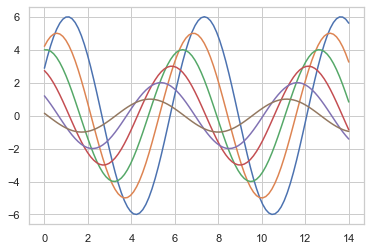

In [6]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set_style('whitegrid')
#加入 sns.set_style()，並於括弧內加入欲選擇的主題，如：sns.set_style(whitegrid)，
#則可得範例二的圖像。範例三、四、五則以此類推。
sinplot()

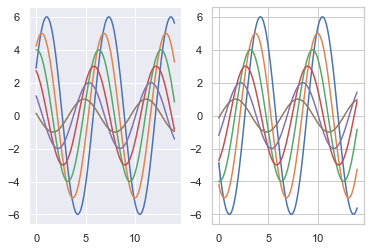

In [7]:
f = plt.figure()
with sns.axes_style('darkgrid'):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

### 線性關係

* 分析的目標通常是將這些變數相互關聯
* 通過視覺化快速輕鬆地流覽數據集
* 以常用的散點圖曲線圖來表示變數之間的關係：relplot()
  * hue：在同一維度上，用顏色區分不同數據
  * style：在同一維度上，線的不同表現形式區分，如：點線、虛線等
  * size：控制點大小或者線條粗細 
  * kind：繪製圖的型態，[散點圖]kind='scatter'(預設值)、[線圖]kind='line'
  * ci(confidence interval)：可來控制陰影部分
* 當 seaborn 的統計估計超越了描述性統計，則可使用 lmplot() 增強散點圖，使其包含線性回歸模型。

#### 散點圖關聯變量

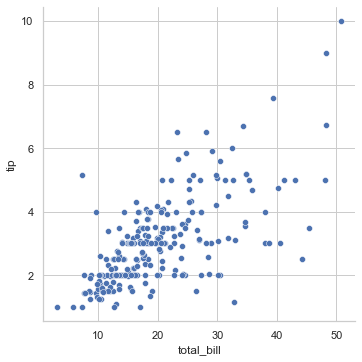

In [8]:
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')

sns.relplot(x='total_bill', y='tip', data=tips)

* 含線性回歸模型

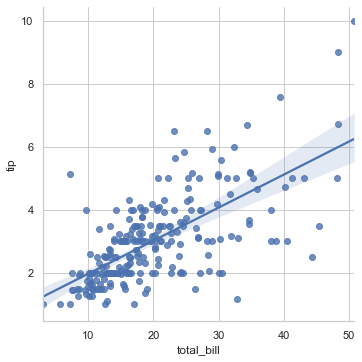

In [9]:
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')

sns.lmplot(x='total_bill', y='tip', data=tips)

* 色調語義

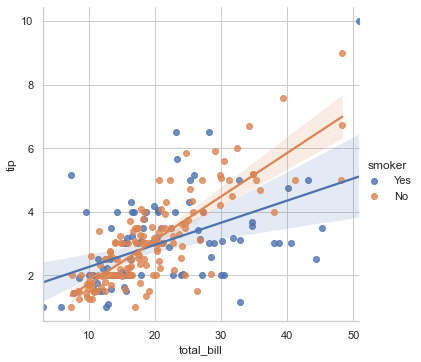

In [10]:
# 當點以兩個維度繪製時,可以通過根據第三個變數對點進行著色,將另一個維度添加到繪圖中。這稱為使用「色調語義」,因為點的顏色獲得意義:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

* 色調和樣式

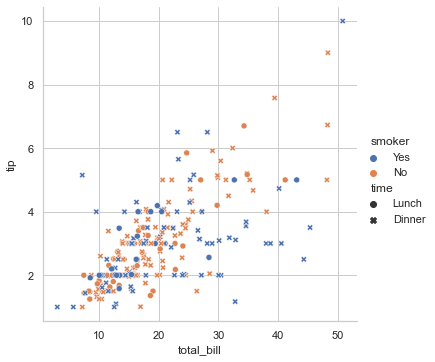

In [11]:
# 通過獨立地改變每個點的色調和样式，也可以表示四個變量
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips)

* 有漸變效果的散點圖

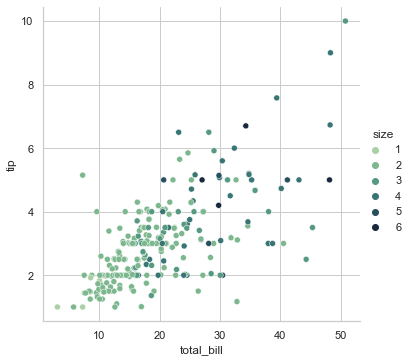

In [12]:
sns.relplot(x='total_bill', y='tip', hue='size', palette='ch:r=-.5,l=.75', data=tips)

### Time Line

In [13]:
sns.set(style='darkgrid')
fmri = sns.load_dataset('fmri') #載入數據集
fmri.sample(50)  #可檢視五十筆隨機資料

,subject,timepoint,event,region,signal
268,s11,4,stim,frontal,0.075957
910,s0,11,cue,parietal,-0.039002
71,s13,13,stim,parietal,-0.068637
342,s7,5,stim,frontal,0.176161
938,s13,11,cue,frontal,-0.040369
44,s12,15,stim,parietal,-0.080698
582,s13,3,cue,parietal,0.000748
915,s10,10,cue,parietal,-0.056047
127,s13,9,stim,parietal,0.013245
718,s3,18,cue,frontal,-0.023402


* 平均值，含 95% 信賴區間

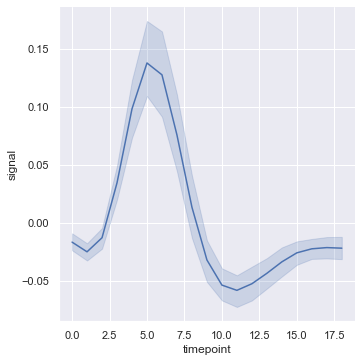

In [14]:
#聚合和表示不確定性 -- 
#更複雜的數據集將具有變數相同值的多個度量。Seaborn 中的預設行為是透過繪製平均值和 95% 信心區間圍繞平均值來聚合每個值的多個測量值:xx
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

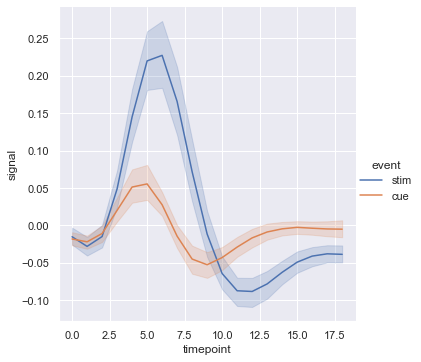

In [15]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri)

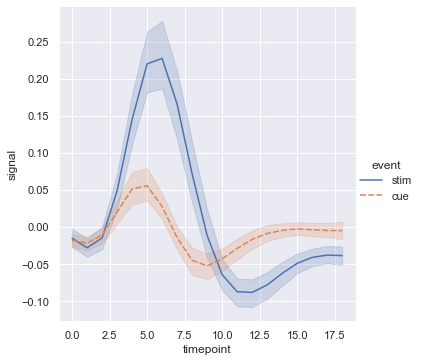

In [16]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event', kind='line', data=fmri)

* 平均值，含標準差(適用於較大的數據)

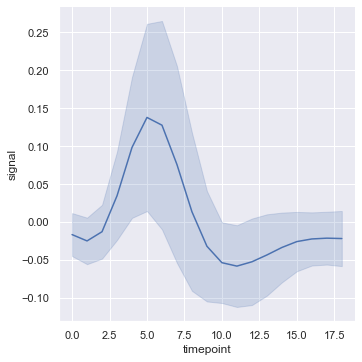

In [17]:
#另一個不錯的選擇(尤其是對於較大的數據)是通過繪製標準差而不是信心區間來表示每個時間點的分佈分佈:
sns.relplot(x='timepoint', y='signal', kind='line', ci='sd', data=fmri)

* 平均值，不含 95% 信賴區間

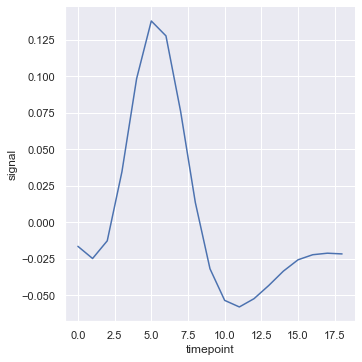

In [18]:
#信心區間是使用引導計算的,對於較大的數據集,這需要時間。因此,可以禁用它們:
sns.relplot(x='timepoint', y='signal', ci=None, kind='line', data=fmri)

* 線條圖添加樣式：破折號模式

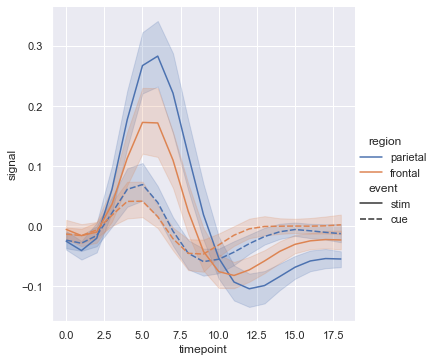

In [19]:
#預設情況下,向線條圖添加樣式語義會更改行中的破折號模式
sns.relplot(x='timepoint', y='signal', hue='region', style='event', kind='line', data=fmri)

* 每次透過觀察時所使用的使用的識別子集或短劃線來替代

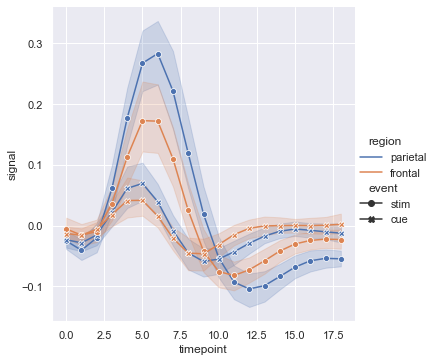

In [20]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event',
            dashes=False, markers=True, kind='line', data=fmri)

### 六邊形分箱圖

* 為散點圖的延伸
* 以特定區域為單位，可以統計出這個區域裡散點的頻率，用顏色表示出現頻率高低

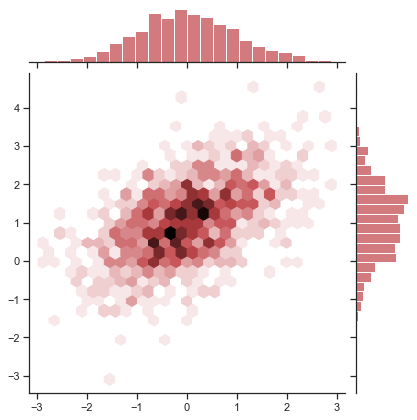

In [21]:
sns.set(color_codes=True)
mean, cov = [0, 1], [(1, .5), (.5, 1)] #設定兩組參數
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style('ticks'):
    sns.jointplot(x=x, y=y, kind='hex', color='r')
plt.show()

### 熱點圖

* 透過不同標示將圖面上或頁面的區域，依照受關注的程度不同來呈現的方式
* 主要用於離散數據波動變化較大
* 特徵與特徵間會有相關係數的存在，利用熱點圖可看出特徵與特徵間的相關程度

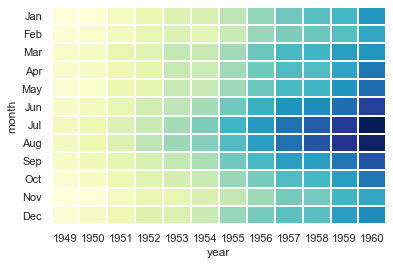

In [22]:
flights = sns.load_dataset('flights') # 載入航班數據	
flights = flights.pivot('month', 'year', 'passengers') # 修改數據排列
# 劃分每格單元的行寬度，使用不同的colormap，取消顏色條
sns.heatmap(flights, linewidths=1 , cmap='YlGnBu', cbar=False) 
plt.show()

### 數據集的分佈

* 首先先先產生隨機的分布數據，由 numpy 生成，數據類型為 ndarray

In [23]:
from scipy import stats, integrate 
sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'distributions')))

#### 繪製單變量分布

* 快速檢視海出生單變數分佈的最便捷方式是 distplot() 函數。默認情況下，這將繪製直方圖並適合內核密度估計值 (KDE)。

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

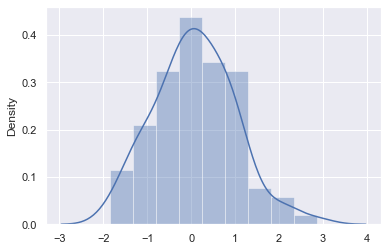

In [24]:
x = np.random.normal(size=100)
sns.distplot(x)
#sns.histplot(x)

#### 繪製直方圖

* 主要選擇是要使用的條柱數和放置位置 
* 透過 bins 來調整直方圖的 bins 數量
* 透過 kde=False 刪除密度曲線，並添加 rug=True，即可增加每一個觀測值得垂直線
* distplot() 使用簡單的規則來正確猜測預設情況下正確的數位，但嘗試更多或更少的 bin 可能會顯示資料中的其他特徵

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

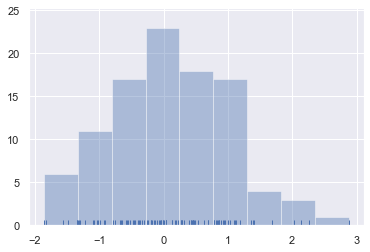

In [25]:
sns.distplot(x, kde=False, rug=True)
#sns.histplot(x, kde=False)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

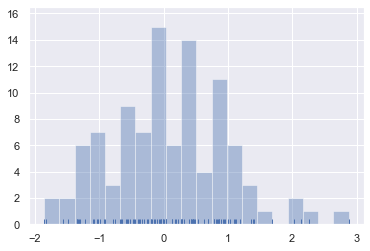

In [26]:
sns.distplot(x, bins=20, kde=False, rug=True)
#sns.histplot(x, bins=20, kde=False)

#### 核密度估計

* KDE plots 會在一個軸上通過高度變化，沿著其他的軸將觀察到的密度編碼

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

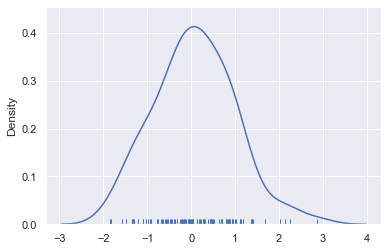

In [27]:
sns.distplot(x, hist=False, rug=True)

<AxesSubplot:>

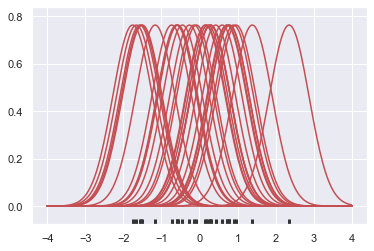

In [28]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')
sns.rugplot(x, color='.2', linewidth=3)

* 將取線進行求和，計算每個點的密度值，最終曲線被歸一化，使得曲線下包圍的面積為一

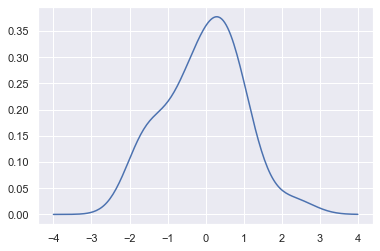

In [29]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

<AxesSubplot:ylabel='Density'>

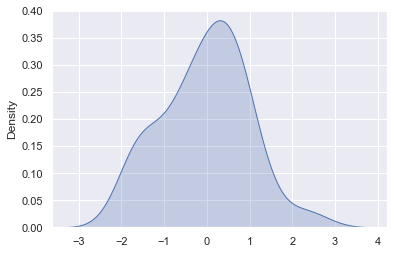

In [30]:
sns.kdeplot(x, shade=True)

#### 繪製雙變量分布

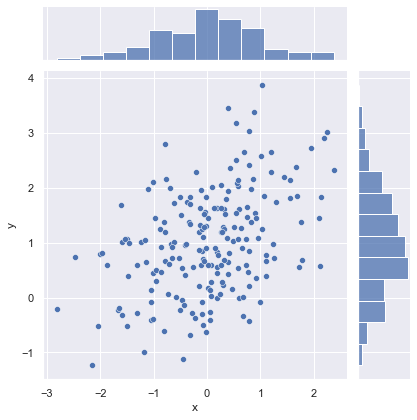

In [31]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
sns.jointplot(x='x', y='y', data=df)

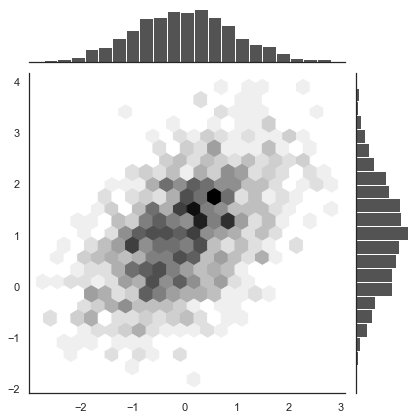

In [32]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='k')

### Boxplot vs. Violinplot

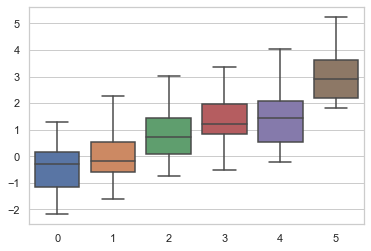

In [33]:
sns.set_style('whitegrid')
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

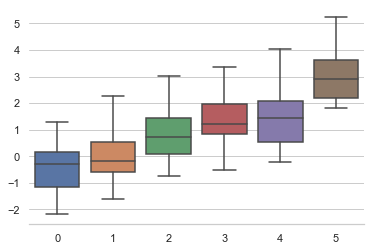

In [35]:
# 使用其他參數控制刪除哪些刺 despine()
sns.boxplot(data=data, palette='deep')
sns.despine(left=True)

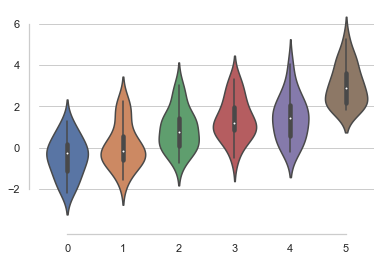

In [34]:
# 一些情節受益於將尖刺偏離數據，這也可以在呼叫時完成despine()。
# 當刻度不覆蓋整個軸範圍時，該trim參數將限制倖存脊柱的範圍。

f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);